## Examen Primer Parcial - Visión para robots
---

#### **Instrucciones** 

1. Lee el notebook completo antes de iniciar.
2. Contesta las celdas de preguntas directamente en el notebook.
3. Para las partes de código, agrega todas las celdas de código que consideres necesarias.
4. El notebook se entrega en Canvas. **Garantiza que hayas ejecutado todas las celdas de código antes de subirlo.**

### Preguntas de desarrollo (5 puntos cada una)
---

Agrega una celda de texto nueva con las respuestas.

1. Se tiene una imagen RGB de 512 de ancho, y 324 de alto. ¿Cuántos pixeles totales tiene la imagen?
2. Describe qué es un espacio de color. ¿Cuál es la diferencia entre el espacio HSV y RGB?
3. ¿Qué son, para qué sirven, y cómo se representan los filtros?
4. Busca dos imágenes en línea: una que sea principalmente de alta frecuencia, y otra que sea de baja frecuencia. Carga las dos imágenes al notebook en un mismo subplot, y describe cuál es la diferencia entre una imagen con alta frecuencia, y otra con baja frecuencia.
5. ¿Qué son las operaciones morfológicas? ¿Cuál es la diferencia entre open, close, dilate, y erode?

### Preguntas de código
---

1. 512 x 324 = 165,888
2. Un espacio de color es la gama en la que se pueden representar los colores, por ejemplo RGB divide los colores entre Rojo, Verde y Azul mientras que HSV lo divide entre en Matiz, Saturacion y Brillo. 
3. Los filtros son el resultado de multiplicar una matriz por los pixeles de una imagen, esto sirve para resaltar cosas que nos interesen (como bordes) o por el contrario para deshacernos de ellas (hacer un blur), se representar de manera en una matriz, por lo general de 3 por 3 
4. La imagenes con alta frecuencia tienen cambios de colores entre pixeles más abruptos, en la primera imagen mostramos un atardecer en el cual podemos ver las sombras de las nubes o la diferencia entre el cielo y el monte; por el contrario en una imagen de baja frecuencia el cambio de colores entre pixeles será más bajo como podemos ver en la segunda imagen hay varios colores pero hay un degradado para llegar del naranja al azul
5. La operaciones morfoloficas son aquellas que se usan para cambiar la forma de una imagen, se usan principalmente en imagenes de dos colores para expandir o reducir los bordes, esto lo hace identificando el borde y cambiando los pixeles a su alrededor, existen 4 funciones que poder utilizar: dilate nos sirve para dilatar una una imagen, es decir que abre los bordes de la imagen haciendola engrosandola; erode hace lo contrario, localiza el borde de la imagen y lo reduce; open hace un erode segido de un dilate, disminuye los bordes y luego vuelve la imagen su tamaño original, esto sirve para cuando tenemos que remover sonido del exterior de la figura; close primero hace un dilate a la figura y luego la devuelve a su estado original, esto ayuda a reducir el ruido dentro de la figura. 

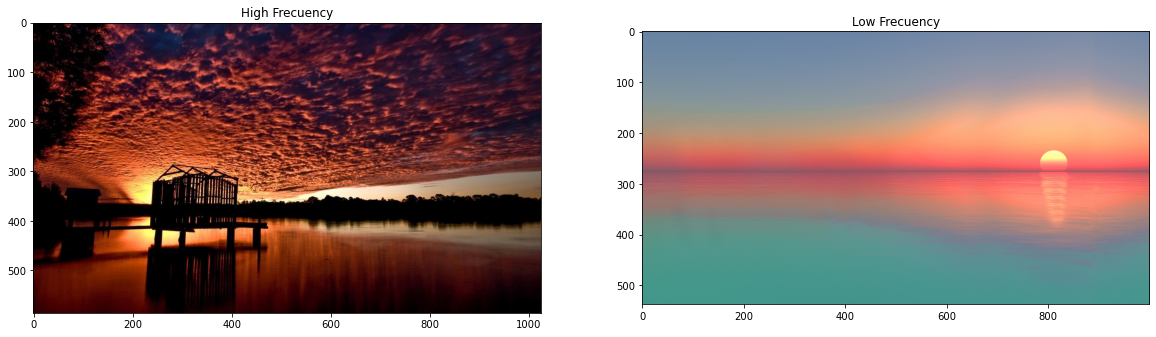

In [2]:
# 4. Imagenes de alta frecuencia y baja frecuencia

import cv2 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

image_high = cv2.imread('images/question4/HighFrecuency.jpeg')
image_low = cv2.imread('images/question4/LowFrecuency.jpeg')

image_high = cv2.cvtColor(image_high, cv2.COLOR_BGR2RGB)
image_low = cv2.cvtColor(image_low, cv2.COLOR_BGR2RGB)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title("High Frecuency")
ax1.imshow(image_high, cmap='gray')

ax2.set_title("Low Frecuency")
ax2.imshow(image_low, cmap='gray')



Imports básicos y ruta de las imágenes de prueba.

In [3]:
import cv2 

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

image_dir = "images/license_plates"



#### Ejercicio 1 (15 puntos)

Crea una imagen de 21 por 21 pixeles, y agrega el código necesario para crear y mostrar el siguiente resultado:

![Examen 1](images/ex1.png)

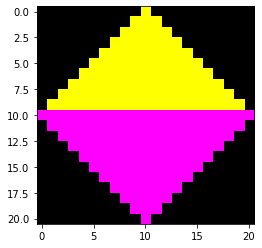

In [4]:
triangle = np.zeros((21, 21, 3), dtype=np.uint8)

for y in range(triangle.shape[1]): 
    for x in range(triangle.shape[0]): 
        if(y < 10) and x <= (10 + y) and x >= (10 - y):
            triangle[y,x,0] = 255
            triangle[y,x,1] = 255
            triangle[y,x,2] = 0

        elif (y >= 10) and x <= (30 - y) and x >= (y - 10):
            triangle[y,x,0] = 255
            triangle[y,x,1] = 0
            triangle[y,x,2] = 255

plt.imshow(triangle)


#### Ejercicio 2 (15 puntos)

Crea el código para implementar un filtro gaussiano y aplicalo a la imagen **peppers.tiff**. **Nota: No uses las funciones filter2d de openCV.**

El filtro es el siguiente: ![GaussianBlur](images/gaussian_blur.png). 



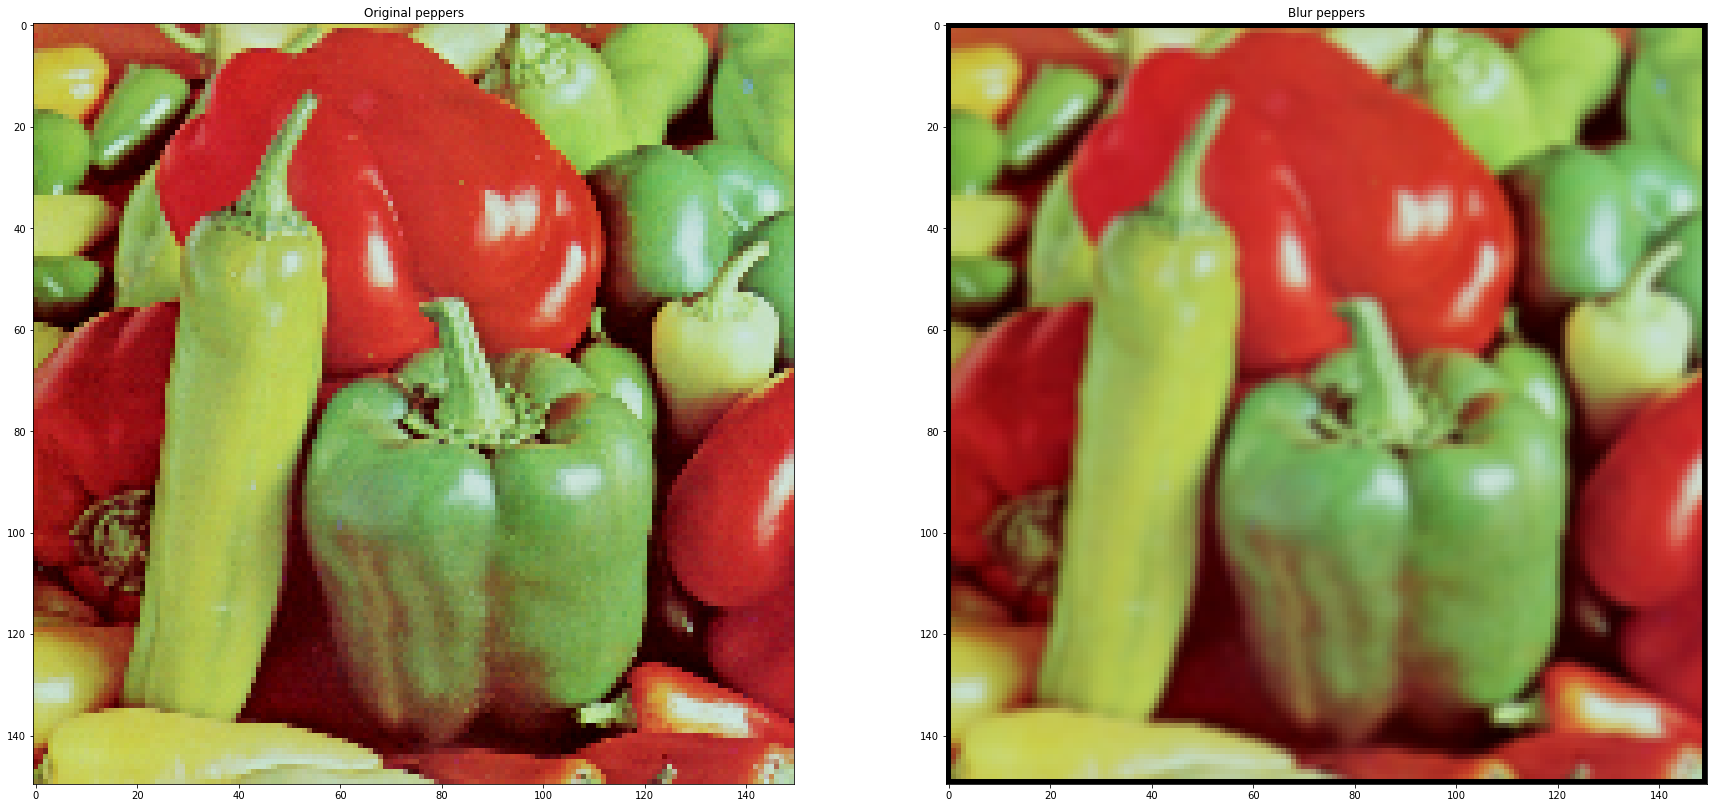

In [5]:
import cv2 

import numpy as np
import matplotlib.pyplot as plt

peppers = cv2.imread('images/peppers.tiff')
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2RGB)
peppers = cv2.resize(peppers, (150,150))


# gauss_x = np.array([[ 0.0625, 0.125, 0.0625], 
#                    [ 0.125, 0.20, 0.125], 
#                    [ 0.0625, 0.125, 0.0625]])

gauss_x = np.array([[ 1*(1/16), 2*(1/16), 1*(1/16)], 
                   [ 2*(1/16), 4*(1/16), 2*(1/16)], 
                   [ 1*(1/16), 2*(1/16), 1*(1/16)]])

y_limit = peppers.shape[1]
x_limit = peppers.shape[0]

filtered_road_x_custom = np.zeros(peppers.shape, dtype=np.uint8)

for y in range(1, y_limit-1):
    for x in range(1, x_limit-1):
        

        suma_x = 0
        for i in range(-1, 2): 
            for j in range(-1, 2): 
                suma_x += gauss_x[i + 1 , j + 1] * peppers[y + i, x + j]
                filtered_road_x_custom[y,x] = np.clip(suma_x,0, 255)

        filtered_road_x_custom[y,x] = suma_x

f3, (ax31,ax32) = plt.subplots(1, 2, figsize=(30,20))
ax31.set_title('Original peppers')
ax31.imshow(peppers, cmap='gray')

ax32.set_title('Blur peppers')
ax32.imshow(filtered_road_x_custom, cmap='gray')



#### Ejercicio 3 (50 puntos)

Crea un pipeline de visión para segmentar los números de las placas de las imágenes que están en la carpeta **images/licene_plates**. Revisa las celdas siguientes para completar las partes que se solicitan. Además de las celdas con funciones predefinidas que tienes que completar, puedes agregar todas las celdas y funciones que consideres necesarias.

El resultado esperado es el siguiente:

![Expected output](images/license_plates/output2.png)

En el plot final, muestra tanto las imágenes originales, como los contornos solamente de la zona donde está la placa.

Las imágenes se pueden ver en la siguiente celda:

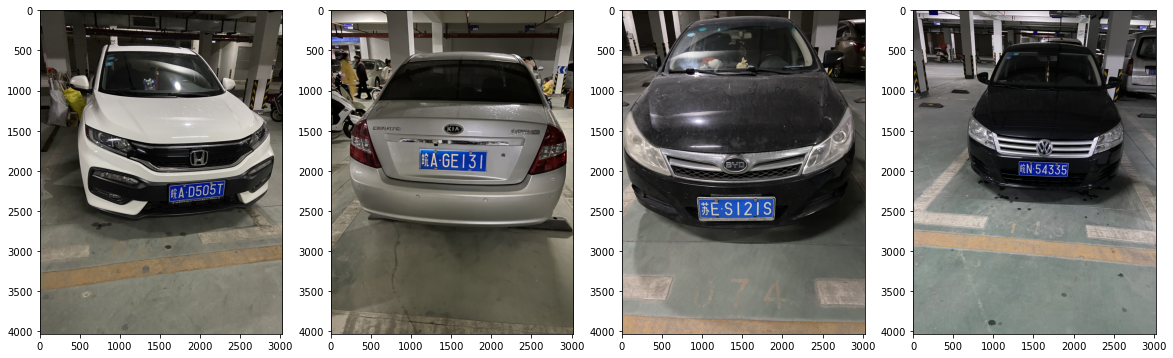

In [6]:
images = []

for i in range(1, 5):
    image = cv2.imread(f'{image_dir}/0{i}.jpeg')
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

f, subplots = plt.subplots(1,4, figsize=(20,10))

for i in range(4):
    subplots[i].imshow(images[i])

In [ ]:
    image = images[1]
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_hue = np.array([120,70,100]) 
    upper_hue = np.array([150,255,255])

    mask_hsv = cv2.inRange(hsv_image, lower_hue, upper_hue)
    image = np.copy(hsv_image)
    image[mask_hsv==0] = [0,0,0]

    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # kernel = np.ones((2,2), np.uint8)
    # opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # ret, thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
    
    # image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # contorno = cv2.drawContours(image, contours, 0, (0,255,0),100)
    # f, (cont, ori) = plt.subplots(1,2, figsize = (20,10))
    # cont.imshow(contorno)



**Define una función con el preprocesamiento que consideras necesario aplicar a todas las imágenes** 

In [8]:
def preprocess(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_hue = np.array([100,50,100]) 
    upper_hue = np.array([150,255,255])

    mask_hsv = cv2.inRange(hsv_image, lower_hue, upper_hue)
    image = np.copy(hsv_image)
    image[mask_hsv==0] = [0,0,0]

    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    return image


**Muestra una figura con el preprocesamiento que aplicaste a las imágenes**

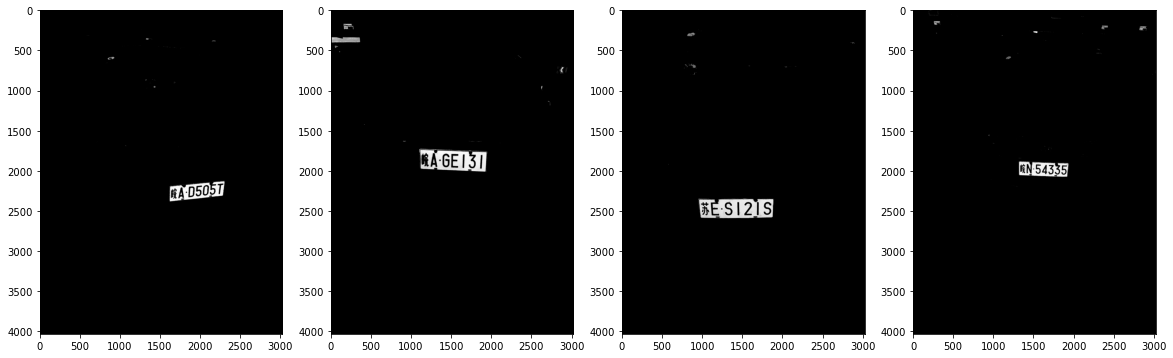

In [9]:

preprocess_images = []
for image in images: 
    image = preprocess(image)
    preprocess_images.append(image)

f, subplots = plt.subplots(1,4, figsize=(20,10))

for i in range(4):
    subplots[i].imshow(preprocess_images[i], cmap = 'gray')

**Crea el código necesario para aplicar el procesamiento a las imágenes. El objetivo es obtener los bordes de los números de las placas** 

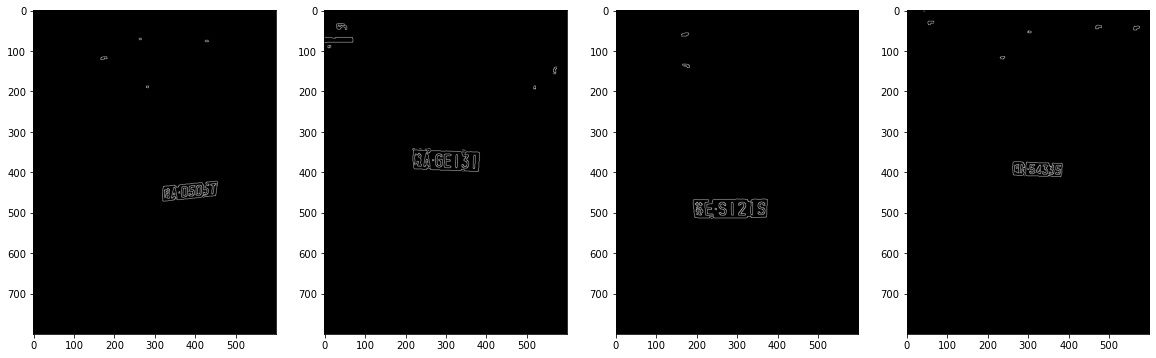

In [10]:
## Agrega el código necesario para procesar las imágenes

def process(image):
    kernel = np.ones((3,3), np.uint8)

    image = cv2.resize(image, (600, 800))
    image = cv2.GaussianBlur(image, (7,7), 0)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    image = cv2.Canny(image, 10, 100)
    image = cv2.dilate(image, (np.ones((1,1), np.uint8)), iterations = 1)
    return image

process_images = []

for image in preprocess_images: 
    image = process(image)
    process_images.append(image)

f, subplots = plt.subplots(1,4, figsize=(20,10))

for i in range(4):
    subplots[i].imshow(process_images[i], cmap = 'gray')

# prueba = process(preprocess_images[1])

# plt.imshow(prueba, cmap = 'gray')

**Completa la siguiente función: El parámetro es una de las imágenes en escala de grises o blanco y negro, y el resultado es una sub-imagen que representa solamente el área de la placa**

In [74]:
def roi(image):
    height, width = image.shape
    min_x = width
    max_x = 0
    min_y = height
    max_y = 0
    crop_x = []
    crop_y = []
    colores = (0,0,0)
    image = image[300:600,:]
    for y in range(height):
        for x in range(width):
            if (image[i,j,3] != colores): 
                crop_x.append(x)
                crop_y.append(y)
    
    min_x = crop_x[0]
    max_x = len(crop_x)
    min_y = crop_y[0]
    max_y = len(crop_y)

    print(min_x,max_x,min_y,max_y)

    return image[min_y:max_y, min_x:max_x]
        

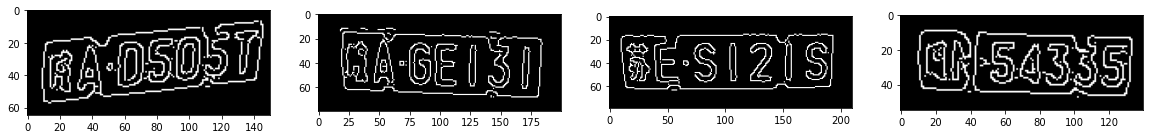

In [58]:
image1 = process_images[0]
image2 = process_images[1]
image3 = process_images[2]
image4 = process_images[3]

cropped_images = []

cropped_images1 = image1[415:480, 310:460]
cropped_images.append(cropped_images1)
cropped_images2 = image2[330:410, 200:400]
cropped_images.append(cropped_images2)
cropped_images3 = image3[450:530, 180:390]
cropped_images.append(cropped_images3)
cropped_images4 = image4[365:420, 250:390]
cropped_images.append(cropped_images4)

f, (c1, c2, c3, c4) = plt.subplots(1,4, figsize=(20,10))
c1.imshow(cropped_images1, cmap = 'gray')
c2.imshow(cropped_images2, cmap = 'gray')
c3.imshow(cropped_images3, cmap = 'gray')
c4.imshow(cropped_images4, cmap = 'gray')

# for i in range(4):
#     subplots[i].imshow(cropped_images[i], cmap = 'gray')

    

**Crea el código necesario para mostar una figura con las imágenes originales en la primer fila, y con el contorno de los números de las placas en la segunda fila**

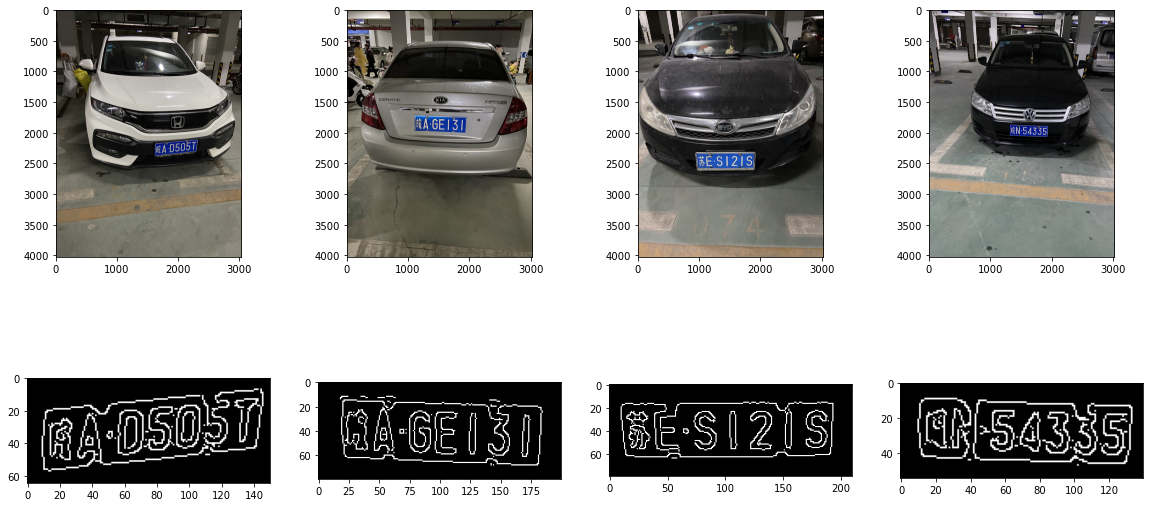

In [59]:

f, (subplots1, subplots2) = plt.subplots(2, 4, figsize=(20,10))

for i in range(2): 
    for j in range(4): 
        if i == 0: 
            subplots1[j].imshow(images[j], cmap = 'gray')
        elif i == 1: 
            subplots2[j].imshow(cropped_images[j], cmap = 'gray')